In [1]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\DMA Analytics\\Documents\\Akansha_Saxena\\Python_Assignment\\loan_data_2007_2014.csv')

In [3]:
# check number of columns and data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# create a new column based on the loan_status column that will be our target variable
data['bad_loan'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)
data.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
X = data.drop('bad_loan', axis = 1)
y = data['bad_loan']

In [6]:
#cols that have > 70% missing values
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729820
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [7]:
#dropping Columns with more than 70% missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
data.drop(columns=columns_to_drop, inplace=True, axis=1)

data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   181686 non-null  int64  
 1   funded_amnt                 181686 non-null  int64  
 2   funded_amnt_inv             181686 non-null  float64
 3   term                        181686 non-null  object 
 4   int_rate                    181686 non-null  float64
 5   installment                 181686 non-null  float64
 6   grade                       181686 non-null  object 
 7   emp_length                  181686 non-null  object 
 8   home_ownership              181686 non-null  object 
 9   annual_inc                  181686 non-null  float64
 10  verification_status         181686 non-null  object 
 11  issue_d                     181686 non-null  object 
 12  pymnt_plan                  181686 non-null  object 
 13  purpose        

<AxesSubplot:>

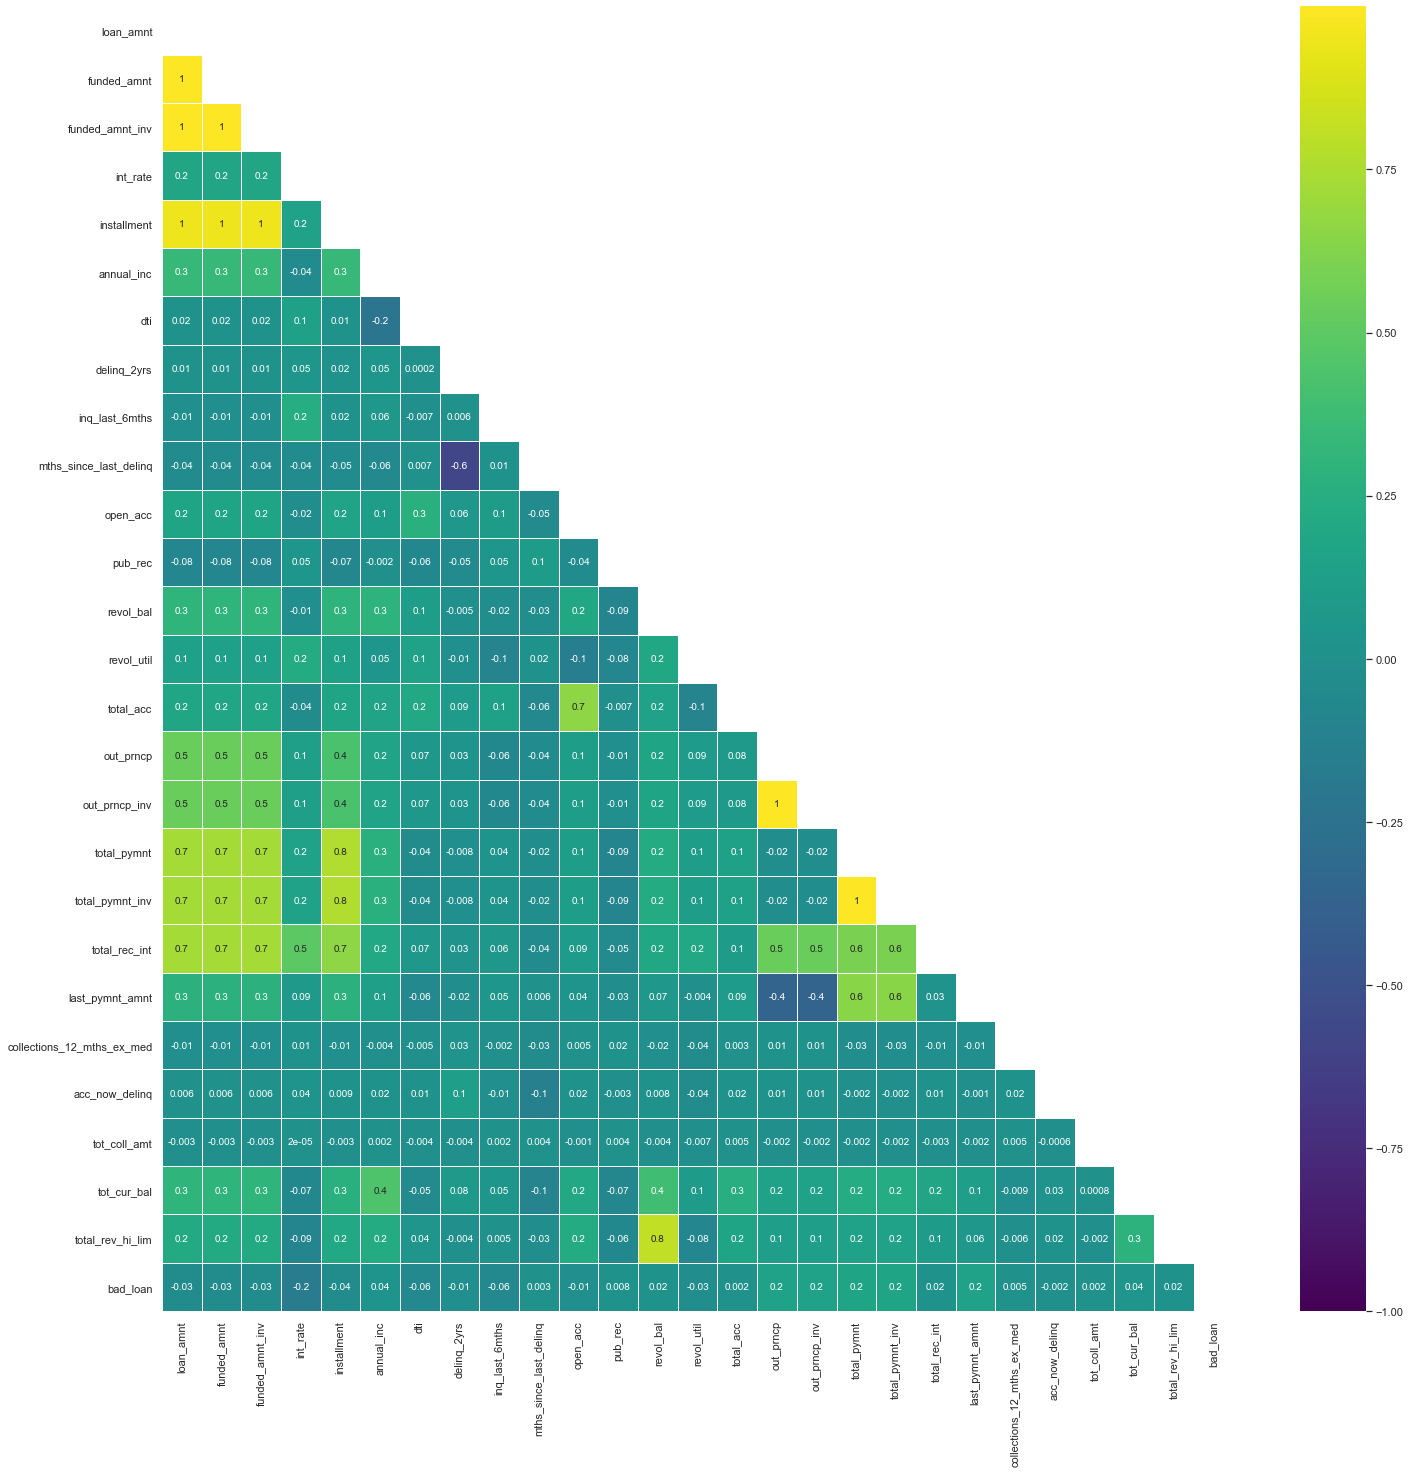

In [9]:
# correlation matrix with correlation co-effiecients 
mask = np.zeros_like(data.corr(method="pearson", min_periods=1, numeric_only = True))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(method="pearson", min_periods=1, numeric_only = True), mask=mask, annot=True,  cmap="viridis", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [10]:
 # Drop Multicollinear variables
    
data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

<AxesSubplot:>

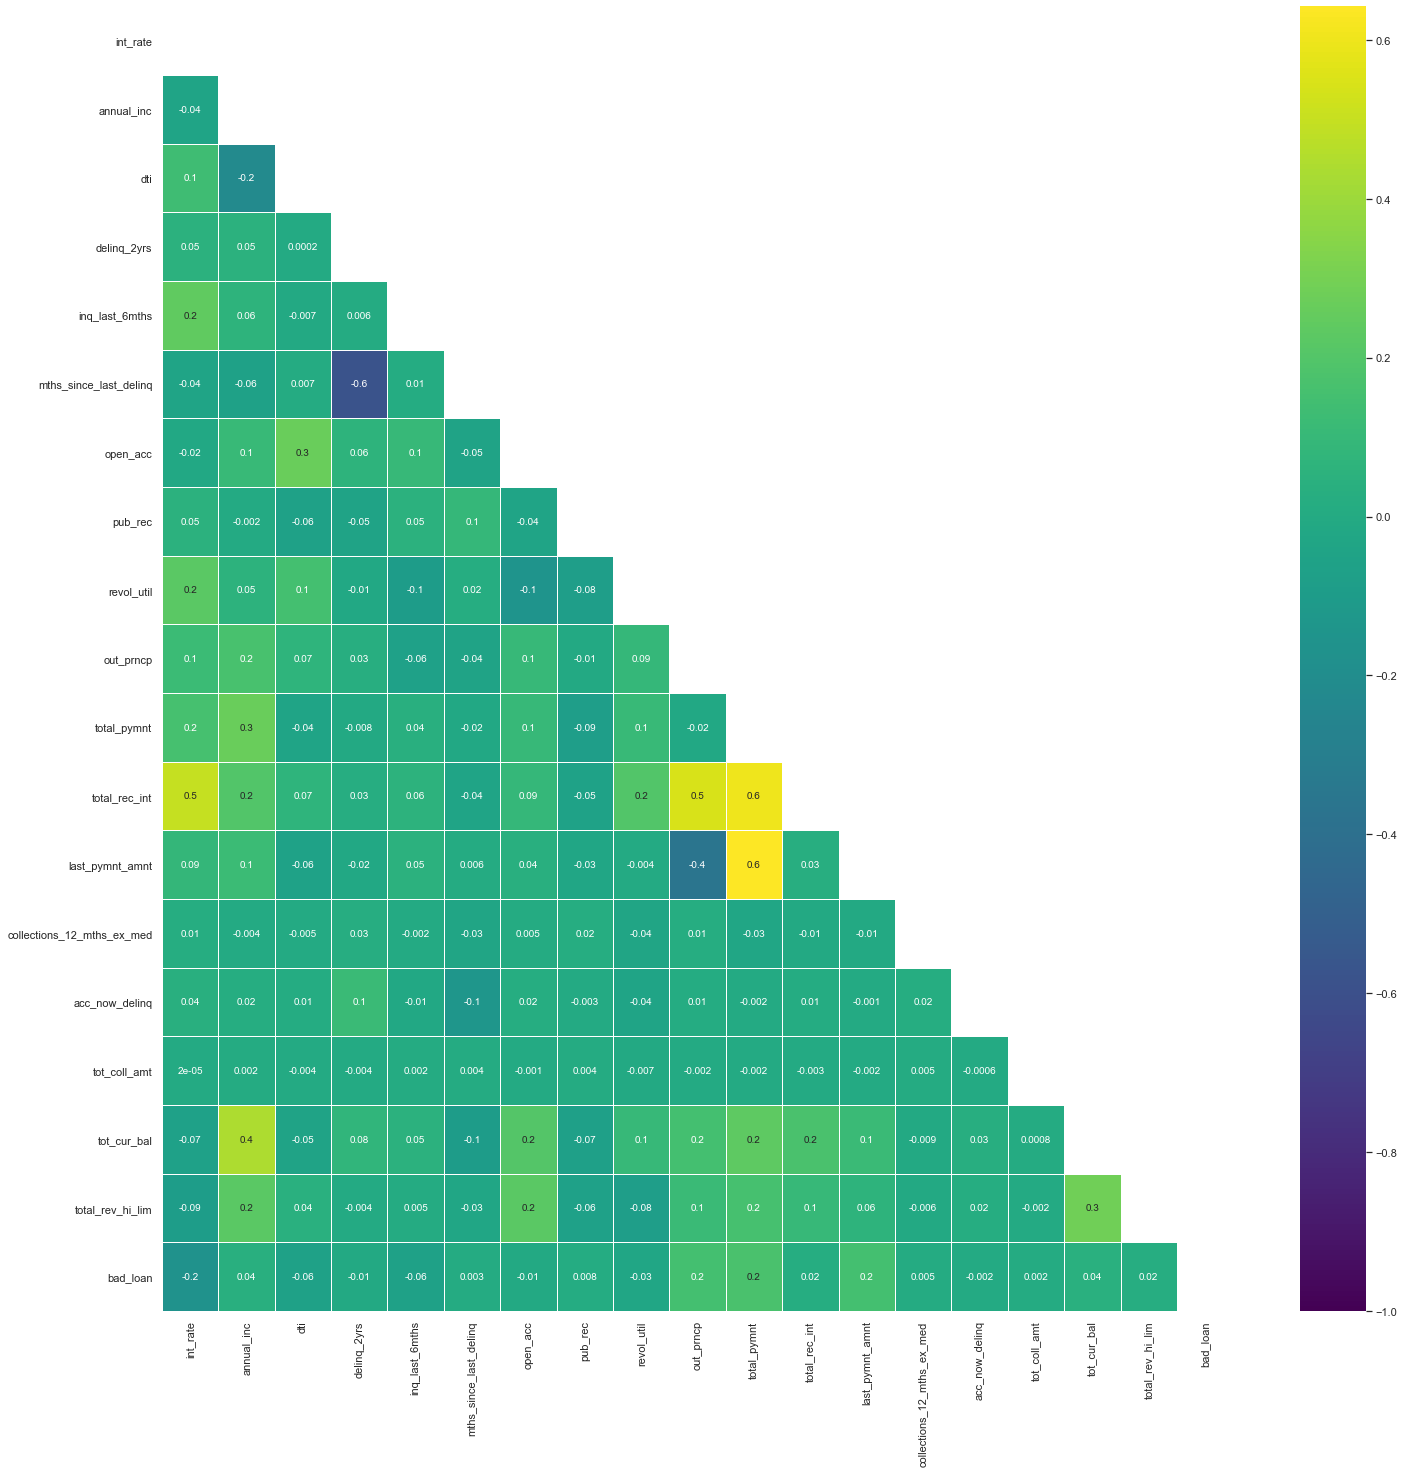

In [11]:
import numpy as np
mask = np.zeros_like(data.corr(method="pearson", min_periods=1, numeric_only = True))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(method="pearson", min_periods=1, numeric_only = True), mask=mask, annot=True,  cmap="viridis", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_cr_lin

In [18]:
# backup = data
data

In [13]:
# converting emp_length to numeric and assign NaN to zero

data['emp_length'] = data['emp_length'].str.extract('(\d+)')
data['term'] = data['term'].str.extract('(\d+)')
data['emp_length'].fillna(value = 0, inplace = True)
data

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,Dec-13,n,debt_consolidation,...,Jan-16,368.45,Jan-16,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1
42538,36,13.53,B,10,RENT,40000.0,Source Verified,Dec-13,n,debt_consolidation,...,Sep-15,119.17,Jan-16,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,Dec-13,n,debt_consolidation,...,Jan-16,476.30,Jan-16,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1
42541,36,12.85,B,4,RENT,88000.0,Not Verified,Dec-13,n,debt_consolidation,...,Jan-16,470.71,Jan-16,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,1
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,Dec-13,n,debt_consolidation,...,Jan-16,321.13,Jan-16,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466277,36,7.90,A,3,RENT,90000.0,Verified,Jan-14,n,debt_consolidation,...,Nov-14,563.23,Oct-14,0.0,INDIVIDUAL,0.0,0.0,42592.0,50300.0,0
466278,36,18.25,D,10,RENT,42000.0,Source Verified,Jan-14,n,vacation,...,Sep-15,5501.60,Jan-16,0.0,INDIVIDUAL,0.0,0.0,10170.0,11100.0,1
466282,60,16.99,D,7,MORTGAGE,46000.0,Verified,Jan-14,n,debt_consolidation,...,Jan-16,514.34,Dec-15,0.0,INDIVIDUAL,0.0,0.0,73598.0,13100.0,1
466283,36,7.90,A,3,OWN,83000.0,Verified,Jan-14,n,credit_card,...,Dec-14,1500.68,Apr-15,0.0,INDIVIDUAL,0.0,0.0,591610.0,53100.0,1


In [14]:
# preprocessing date cols 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

In [15]:
# checking for missing values 

missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

In [16]:
# seperating categorical features from numerical
categorical_features = data.select_dtypes(exclude='number')
numerical_features = data.select_dtypes(exclude='object')

In [17]:
preprocess_data = data

#checking for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

### Binning, Weight of Evidence (WoE), Information Value (IV)

In [18]:
#function to calculate Weight of Evidence (WoE) and Information Value (IV)

def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(preprocess_data, target='bad_loan', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007174
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of last_pymnt_amnt is 1.491828
Information v

In [24]:
#drop columns with low IV
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [25]:
# dummy variables for cat cols
data_dummies1 = pd.get_dummies(preprocess_data)

In [26]:
data_dummies1

,int_rate,annual_inc,dti,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,bad_loan,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
42537,6.62,105000.0,14.05,1.0,4266.62,8842.800000,1109.42,267646.0,61100.0,1,...,False,False,False,False,False,False,False,False,False,True
42538,13.53,40000.0,16.94,0.0,0.00,13359.770000,1359.78,13605.0,8100.0,1,...,False,False,False,False,False,False,False,False,False,True
42539,8.90,63000.0,16.51,0.0,5449.27,11431.200000,1880.47,272492.0,15400.0,1,...,False,False,False,False,False,False,False,False,False,True
42541,12.85,88000.0,10.02,0.0,5274.10,11296.940000,2571.04,17672.0,4500.0,1,...,False,False,False,False,False,False,False,False,True,False
42543,9.67,102000.0,15.55,0.0,3659.12,7706.810000,1365.93,39143.0,22300.0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466277,7.90,90000.0,10.33,0.0,0.00,5631.670000,1050.78,42592.0,50300.0,0,...,False,False,False,False,False,False,False,False,True,False
466278,18.25,42000.0,11.57,0.0,0.00,12394.165200,2394.17,10170.0,11100.0,1,...,False,False,True,False,False,False,False,False,True,False
466282,16.99,46000.0,25.65,2.0,14428.31,12343.980000,6072.29,73598.0,13100.0,1,...,False,False,False,False,False,False,False,False,True,False
466283,7.90,83000.0,5.39,1.0,0.00,2126.579838,126.58,591610.0,53100.0,1,...,False,False,False,False,False,False,False,False,False,True


In [27]:
# function to calculate WoE of cat features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [28]:
# function to plot WoE
import numpy as np

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [29]:
#seperating data into target and features
X= preprocess_data.drop(columns='bad_loan', axis=1)
y=preprocess_data['bad_loan']

### Creating New Features Based on WoE

In [36]:
new_df = data_dummies1

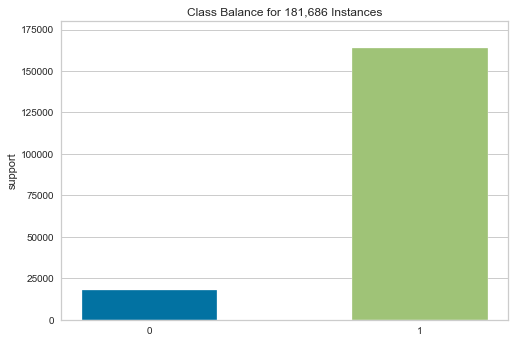

<AxesSubplot:title={'center':'Class Balance for 181,686 Instances'}, ylabel='support'>

In [37]:
#check if class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='bad_loan', axis=1)
y = new_df['bad_loan']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

In [42]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X,y)
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [102]:
oversampled_X

,int_rate,annual_inc,dti,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,6.620000,105000.000000,14.050000,1.000000,4266.620000,8842.800000,1109.420000,267646.000000,61100.000000,79.000000,...,False,False,False,False,False,False,False,False,False,True
1,13.530000,40000.000000,16.940000,0.000000,0.000000,13359.770000,1359.780000,13605.000000,8100.000000,79.000000,...,False,False,False,False,False,False,False,False,False,True
2,8.900000,63000.000000,16.510000,0.000000,5449.270000,11431.200000,1880.470000,272492.000000,15400.000000,79.000000,...,False,False,False,False,False,False,False,False,False,True
3,12.850000,88000.000000,10.020000,0.000000,5274.100000,11296.940000,2571.040000,17672.000000,4500.000000,79.000000,...,False,False,False,False,False,False,False,False,True,False
4,9.670000,102000.000000,15.550000,0.000000,3659.120000,7706.810000,1365.930000,39143.000000,22300.000000,79.000000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327719,15.924903,54764.363305,22.644949,0.000000,0.000000,7043.106632,3272.872606,56891.149849,16810.908262,77.114906,...,False,False,False,False,False,False,False,False,True,False
327720,12.971156,100000.000000,11.776369,1.593161,0.000000,5588.816766,1441.469893,48351.431351,15967.689057,86.931606,...,False,False,False,False,False,False,False,False,True,False
327721,8.112399,79530.610291,8.362147,0.882653,552.774444,14153.875454,2191.701360,172174.320714,27205.140691,83.000000,...,False,False,False,False,False,False,False,True,True,True
327722,23.927081,35849.290128,27.817350,1.000000,8291.656992,5412.218433,2419.046255,42175.509670,3372.295979,69.332448,...,False,False,False,False,False,False,False,False,True,True


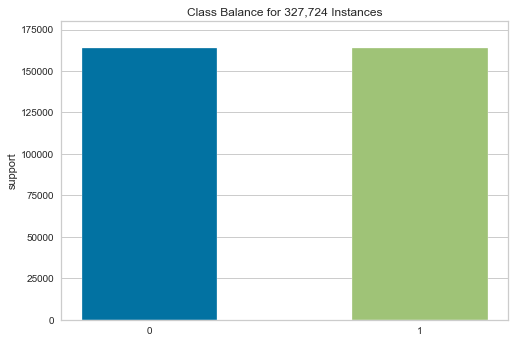

<AxesSubplot:title={'center':'Class Balance for 327,724 Instances'}, ylabel='support'>

In [43]:
from yellowbrick.target import ClassBalance
X= oversampled_X
y = oversampled_Y
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

In [44]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance for training dataset
y_train.value_counts()

bad_loan
1    131333
0    130846
Name: count, dtype: int64

In [46]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_train

39963     1
199957    0
264901    0
154173    1
60218     0
         ..
103531    1
92806     1
268587    0
311742    0
249166    0
Name: bad_loan, Length: 262179, dtype: int32

In [61]:
#predicting
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     33016
           1       0.81      0.79      0.80     32529

    accuracy                           0.80     65545
   macro avg       0.80      0.80      0.80     65545
weighted avg       0.80      0.80      0.80     65545



Confusion matrix
[[26947  6069]
 [ 6927 25602]]


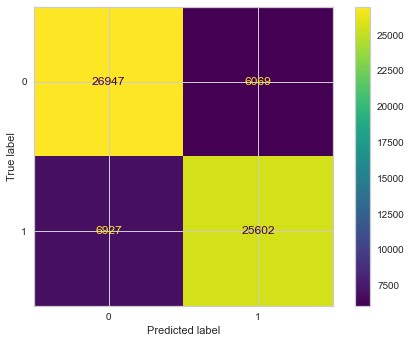

In [67]:
print('Confusion matrix')
cf_mat = confusion_matrix(y_test, y_preds)
print(cf_mat)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat,display_labels=model.classes_)
disp.plot()

# plt.show()

In [59]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 2 AUC score: 0.8016157939604587


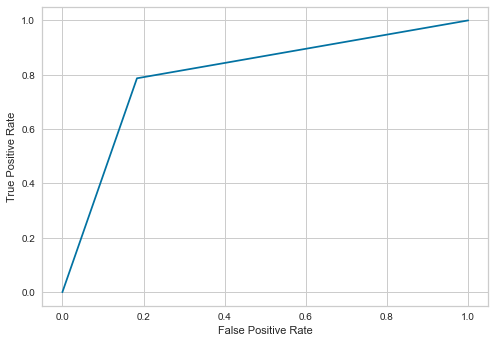

In [60]:
plot_roc_curve(y_test, y_preds)
print(f'model 2 AUC score: {roc_auc_score(y_test, y_preds)}')